In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder 

### EDA

In [31]:
data=pd.read_csv("mushrooms.csv")

In [32]:

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Attribute Information: (classes: edible=e, poisonous=p)
```
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

```

In [33]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [35]:
data.shape

(8124, 23)

In [36]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [37]:

cols=list(data.drop("class",axis=1).columns)

In [39]:
import pandas as pd
df=pd.read_csv("mushrooms.csv")

In [40]:
len(df.columns)

23

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
### Checking for constant values 
for col in cols:
    if len(data[col].unique())==1:
        print(col)

veil-type


In [43]:
data.drop("veil-type",axis=1,inplace=True)

```
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
pd.crosstab(data['class'],data['cap-surface']).plot(kind="bar")

plt.show()
```

<AxesSubplot: xlabel='odor', ylabel='count'>

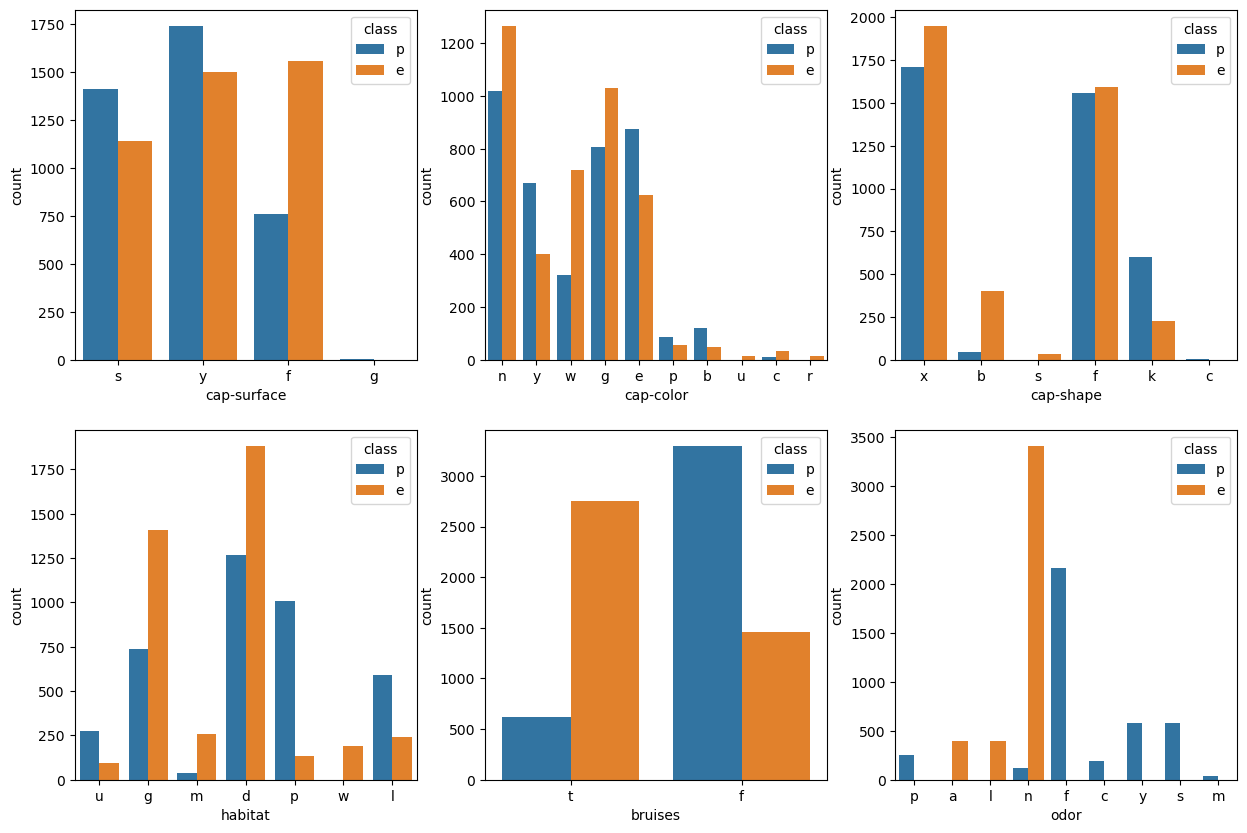

In [44]:
f,axes=plt.subplots(2,3,figsize=(15,10))
#plt.title("")
sns.countplot(data=data,x=data["cap-surface"],hue="class",ax=axes[0,0])
sns.countplot(data=data,x=data["cap-color"],hue="class",ax=axes[0,1])
sns.countplot(data=data,x=data["cap-shape"],hue="class",ax=axes[0,2])
sns.countplot(data=data,x=data["habitat"],hue="class",ax=axes[1,0])
sns.countplot(data=data,x=data["bruises"],hue="class",ax=axes[1,1])
sns.countplot(data=data,x=data["odor"],hue="class",ax=axes[1,2])

##### * check for the odor class as there are separate subclasses for edible and poisonous class 

In [45]:

#pd.crosstab(data['class'],data['cap-surface'])

#plt.bar(data=pd.crosstab(data['class'],data['cap-surface']),height="counts")



### Need to work on 
 - bruises
 - gill-attachment

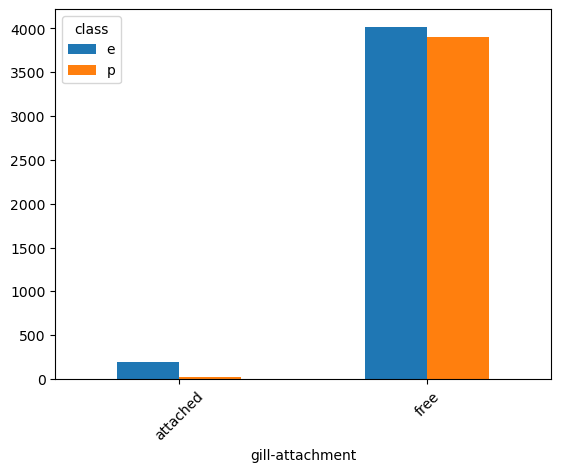

In [46]:
#plt.figure(figsize=(10,5))

pd.crosstab(data["gill-attachment"],data["class"]).plot(kind="bar")

plt.xticks(ticks=[0,1],labels=["attached","free"],rotation=45)
plt.show()

In [47]:

labels=["pungent=p","almond=a","anise=l","none=n","foul=f","creosote=c","fishy=y","spicy=s","musty=m"]


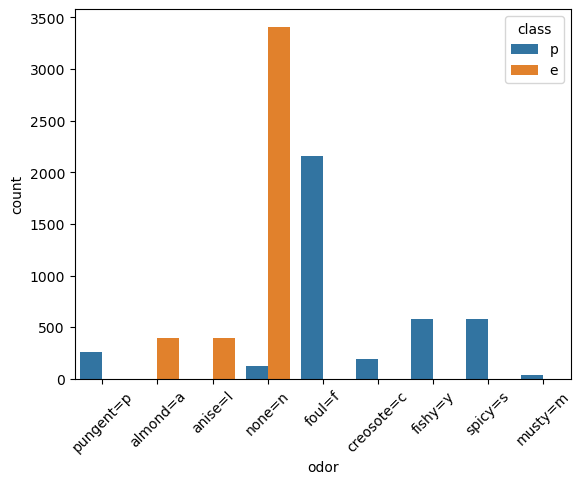

In [48]:
sns.countplot(data=data,x="odor",hue="class")
plt.xticks(np.arange(0,9),labels=labels,rotation=45)
plt.show()

<AxesSubplot: xlabel='stalk-root', ylabel='count'>

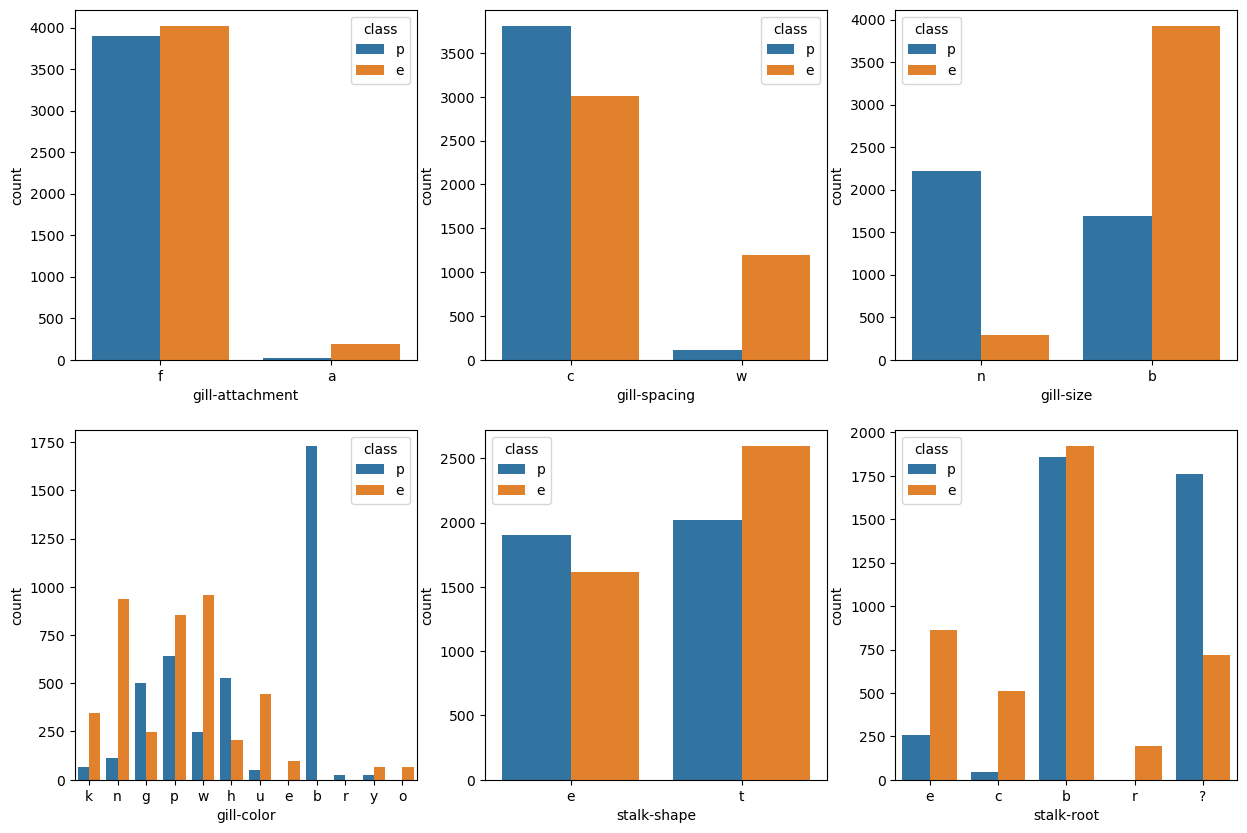

In [49]:
#plt.figure(figsize=(10,15))

f,axes=plt.subplots(2,3,figsize=(15,10))
sns.countplot(data=data,x="gill-attachment",hue='class',ax=axes[0,0])

sns.countplot(data=data,x="gill-spacing",hue='class',ax=axes[0,1])
sns.countplot(data=data,x="gill-size",hue='class',ax=axes[0,2])
sns.countplot(data=data,x="gill-color",hue='class',ax=axes[1,0])
sns.countplot(data=data,x="stalk-shape",hue='class',ax=axes[1,1])
sns.countplot(data=data,x="stalk-root",hue='class',ax=axes[1,2])





In [50]:
pd.crosstab(data["stalk-root"],data["class"],normalize=True)

class,e,p
stalk-root,,
?,0.088626,0.216642
b,0.236337,0.228459
c,0.063023,0.005416
e,0.106352,0.031512
r,0.023634,0.000000


```
replace '?' by 'm' (missing)
```
- As those value are missing are maybe because of some reason of the structure of the mushroom , so instead of impute it by 'mode' we can consider it as a different category 


In [51]:
data["stalk-root"].replace("?","m",inplace=True)

In [52]:
data["stalk-root"].unique()

array(['e', 'c', 'b', 'r', 'm'], dtype=object)

###
- There are approx 22% mising values in stalk-root

In [53]:
try:
    plt.figure(figsize=(15,20))
    for i in range(len(c)):
        plt.subplot(4,3,i+1)
        sns.countplot(data=data,x=data[c[i]],hue="class")
        
except Exception as e:
    print(e)

name 'c' is not defined


<Figure size 1500x2000 with 0 Axes>

### TO do 
- Feature Importance  ``` --> |check by different methods (random forest,xgboost,catboost)| ```
- Catboost





In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score,roc_auc_score


In [55]:
X=data.drop(["class"],axis=1)
y=data[["class"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=53)

In [56]:
X_train.shape,y_train.shape

((5686, 21), (5686, 1))

In [57]:
cols.remove("veil-type")

In [58]:
cols


['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [59]:
encoder=LabelEncoder()

In [60]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [61]:
X_train=encoder.fit_transform(X_train)

In [62]:
X_test=encoder.transform(X_test)

for col in cols:
    X_train[col]=encoder.fit_transform(X_train[col])



In [63]:
model=RandomForestClassifier(n_estimators=100)

In [64]:
model.fit(X_train,y_train)

/tmp/ipykernel_101/2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [65]:
y_pred=model.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1299
           p       1.00      1.00      1.00      1139

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [67]:
model.feature_importances_

array([0.00498865, 0.01148254, 0.01417553, 0.04260842, 0.16254545,
       0.00243142, 0.03989292, 0.11568308, 0.12775085, 0.02390806,
       0.04506755, 0.05776927, 0.03977216, 0.01685985, 0.01451634,
       0.00194349, 0.00923278, 0.07695083, 0.09650619, 0.06210939,
       0.03380519])

In [68]:
d=pd.Series(model.feature_importances_,index=X.columns)

In [69]:
feature_df=pd.DataFrame(d,columns=["importance"]);feature_df

,importance
cap-shape,0.004989
cap-surface,0.011483
cap-color,0.014176
bruises,0.042608
odor,0.162545
gill-attachment,0.002431
gill-spacing,0.039893
gill-size,0.115683
gill-color,0.127751
stalk-shape,0.023908


<AxesSubplot: >

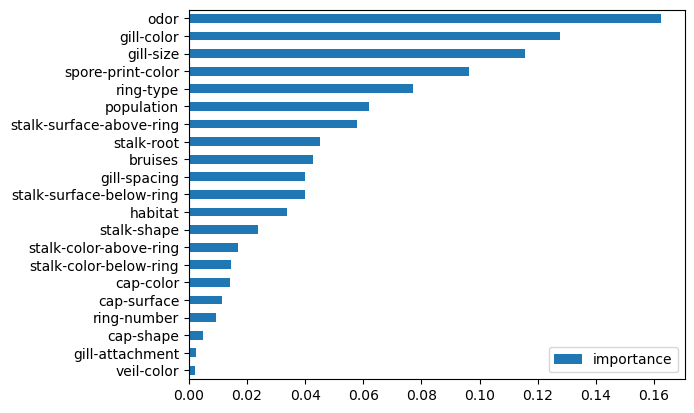

In [70]:
feature_df.sort_values(by="importance").plot(kind="barh")

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
y=data["class"]

In [73]:
encoder=LabelEncoder()

In [74]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [75]:
encoder.fit_transform(y)

array([1, 0, 0, ..., 0, 1, 0])